In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Reading the ILPD dataset

In [3]:
df = pd.read_csv("ILPD.csv")
df

,Age,Gender,TB,DB,AP,SGPT,SGOT,TP,ALB,A/G,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Encoding Gender column

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder_x = LabelEncoder()
df['Gender'] = label_encoder_x.fit_transform(df[['Gender']])
df

,Age,Gender,TB,DB,AP,SGPT,SGOT,TP,ALB,A/G,Target
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Checking for NULL values

In [5]:
df.isnull().values.any()

True

In [6]:
df.isnull().sum().sum()

4

In [7]:
df[df.isnull().any(axis=1)]

,Age,Gender,TB,DB,AP,SGPT,SGOT,TP,ALB,A/G,Target
209,45,0,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,1,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,0,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,1,1.3,0.6,106,25,54,8.5,4.8,NaN,2


# Handling Missing data by MultiVariate Imputation

In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

df2 = df.copy()

In [9]:
cont_feats = [col for col in df2.columns if df2[col].dtype != object]

In [10]:
iter_imputer = IterativeImputer(random_state=42)
iter_imputed = iter_imputer.fit_transform(df2[cont_feats])
df2 = pd.DataFrame(iter_imputed, columns=cont_feats)

In [11]:
df2['A/G'] = np.round(df2[['A/G']],2)

In [12]:
df2.iloc[[209,241,253,312],:]

,Age,Gender,TB,DB,AP,SGPT,SGOT,TP,ALB,A/G,Target
209,45.0,0.0,0.9,0.3,189.0,23.0,33.0,6.6,3.9,1.31,1.0
241,51.0,1.0,0.8,0.2,230.0,24.0,46.0,6.5,3.1,0.92,1.0
253,35.0,0.0,0.6,0.2,180.0,12.0,15.0,5.2,2.7,0.99,2.0
312,27.0,1.0,1.3,0.6,106.0,25.0,54.0,8.5,4.8,1.37,2.0


In [13]:
df = df2
df

,Age,Gender,TB,DB,AP,SGPT,SGOT,TP,ALB,A/G,Target
0,65.0,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0
1,62.0,1.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0
2,62.0,1.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0
3,58.0,1.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0
4,72.0,1.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0
...,...,...,...,...,...,...,...,...,...,...,...
578,60.0,1.0,0.5,0.1,500.0,20.0,34.0,5.9,1.6,0.37,2.0
579,40.0,1.0,0.6,0.1,98.0,35.0,31.0,6.0,3.2,1.10,1.0
580,52.0,1.0,0.8,0.2,245.0,48.0,49.0,6.4,3.2,1.00,1.0
581,31.0,1.0,1.3,0.5,184.0,29.0,32.0,6.8,3.4,1.00,1.0


# Log1 p Transformation

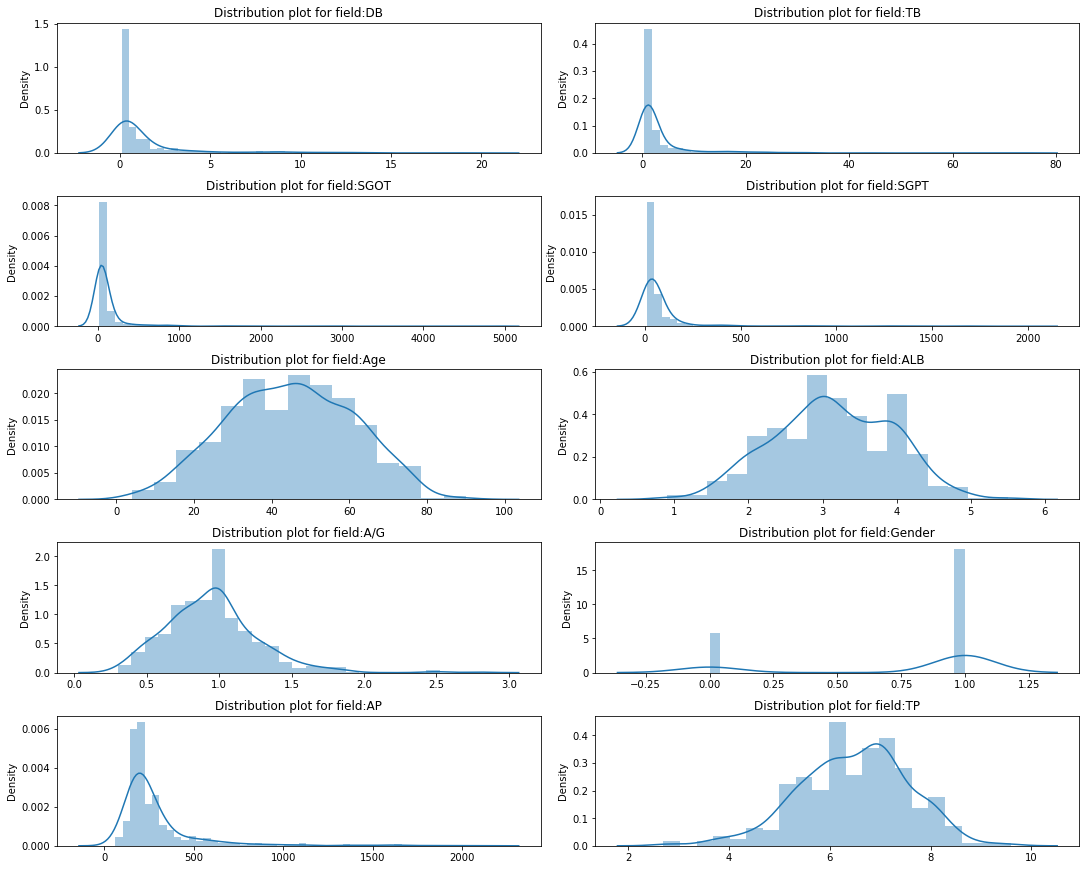

In [14]:
plt.figure(figsize=(15, 12))

for i, c in enumerate(['DB', 'TB', 'SGOT', 'SGPT', 'Age', 'ALB', 'A/G', 'Gender', 'AP', 'TP']):
    plt.subplot(5, 2, i+1)
    sns.distplot(df[c])
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [15]:
skewed_cols = ['A/G', 'TB', 'AP', 'SGPT', 'DB', 'SGOT']

In [16]:
# Apply log1p transformation on dataframe - just selected values
for c in skewed_cols:
    df[c] = df[c].apply('log1p')

In [17]:
df

,Age,Gender,TB,DB,AP,SGPT,SGOT,TP,ALB,A/G,Target
0,65.0,0.0,0.530628,0.095310,5.236442,2.833213,2.944439,6.8,3.3,0.641854,1.0
1,62.0,1.0,2.476538,1.871802,6.551080,4.174387,4.615121,7.5,3.2,0.553885,1.0
2,62.0,1.0,2.116256,1.629241,6.196444,4.110874,4.234107,7.0,3.3,0.636577,1.0
3,58.0,1.0,0.693147,0.336472,5.209486,2.708050,3.044522,6.8,3.4,0.693147,1.0
4,72.0,1.0,1.589235,1.098612,5.278115,3.332205,4.094345,7.3,2.4,0.336472,1.0
...,...,...,...,...,...,...,...,...,...,...,...
578,60.0,1.0,0.405465,0.095310,6.216606,3.044522,3.555348,5.9,1.6,0.314811,2.0
579,40.0,1.0,0.470004,0.095310,4.595120,3.583519,3.465736,6.0,3.2,0.741937,1.0
580,52.0,1.0,0.587787,0.182322,5.505332,3.891820,3.912023,6.4,3.2,0.693147,1.0
581,31.0,1.0,0.832909,0.405465,5.220356,3.401197,3.496508,6.8,3.4,0.693147,1.0


# Balance Dataset

In [18]:
from sklearn.utils import resample
df.Target.value_counts()

1.0    416
2.0    167
Name: Target, dtype: int64

In [19]:
# Split data on majority and minority.. minority is dataset == 2
minority = df[df.Target == 2]
majority = df[df.Target == 1]

print('Minority size:', minority.shape)
print('Majority size:', majority.shape)

Minority size: (167, 11)
Majority size: (416, 11)


In [20]:
# choosing upsample as even now we do not have too much data
minority_upsample = resample(minority, replace=True, n_samples=majority.shape[0],random_state=42)
print('Minority upsampled size:',  minority_upsample.shape)


Minority upsampled size: (416, 11)


In [21]:
# merge majority with upsampled minority
pd.concat([minority_upsample, majority], axis=0)

,Age,Gender,TB,DB,AP,SGPT,SGOT,TP,ALB,A/G,Target
364,21.0,1.0,0.587787,0.182322,5.214936,3.526361,4.060443,6.8,3.5,0.693147,2.0
329,21.0,1.0,0.530628,0.182322,5.356586,2.708050,3.178054,7.3,4.1,0.788457,2.0
45,35.0,1.0,1.029619,0.470004,5.620401,3.891820,5.187386,6.5,3.2,0.641854,2.0
371,33.0,1.0,0.587787,0.182322,4.912655,3.433987,3.401197,7.2,4.4,0.916291,2.0
276,35.0,1.0,0.641854,0.182322,5.252273,3.258097,3.044522,6.4,3.6,0.788457,2.0
...,...,...,...,...,...,...,...,...,...,...,...
576,32.0,1.0,2.772589,2.219203,5.669881,4.077537,4.394449,5.3,2.2,0.530628,1.0
577,32.0,1.0,2.617396,2.240710,5.252273,3.367296,3.871201,5.4,2.6,0.641854,1.0
579,40.0,1.0,0.470004,0.095310,4.595120,3.583519,3.465736,6.0,3.2,0.741937,1.0
580,52.0,1.0,0.587787,0.182322,5.505332,3.891820,3.912023,6.4,3.2,0.693147,1.0


In [22]:
# merge majority with upsampled minority
df = pd.concat([minority_upsample, majority], axis=0)
df = df.reset_index(drop=True)
df


,Age,Gender,TB,DB,AP,SGPT,SGOT,TP,ALB,A/G,Target
0,21.0,1.0,0.587787,0.182322,5.214936,3.526361,4.060443,6.8,3.5,0.693147,2.0
1,21.0,1.0,0.530628,0.182322,5.356586,2.708050,3.178054,7.3,4.1,0.788457,2.0
2,35.0,1.0,1.029619,0.470004,5.620401,3.891820,5.187386,6.5,3.2,0.641854,2.0
3,33.0,1.0,0.587787,0.182322,4.912655,3.433987,3.401197,7.2,4.4,0.916291,2.0
4,35.0,1.0,0.641854,0.182322,5.252273,3.258097,3.044522,6.4,3.6,0.788457,2.0
...,...,...,...,...,...,...,...,...,...,...,...
827,32.0,1.0,2.772589,2.219203,5.669881,4.077537,4.394449,5.3,2.2,0.530628,1.0
828,32.0,1.0,2.617396,2.240710,5.252273,3.367296,3.871201,5.4,2.6,0.641854,1.0
829,40.0,1.0,0.470004,0.095310,4.595120,3.583519,3.465736,6.0,3.2,0.741937,1.0
830,52.0,1.0,0.587787,0.182322,5.505332,3.891820,3.912023,6.4,3.2,0.693147,1.0


# Splitting into train and test set

In [23]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()
standard_data = pd.DataFrame(standard_scaler.fit_transform(X), columns=X.columns)
standardized_X_train = pd.DataFrame(standard_scaler.fit_transform(X_train), columns=X.columns)
standardized_X_test = pd.DataFrame(standard_scaler.fit_transform(X_test), columns=X.columns)

min_max_scaler = preprocessing.MinMaxScaler()
minmax_data = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns)
minmax_X_train = pd.DataFrame(min_max_scaler.fit_transform(X_train), columns=X.columns)
minmax_X_test = pd.DataFrame(min_max_scaler.fit_transform(X_test), columns=X.columns)

max_abs_scaler = preprocessing.MaxAbsScaler()
maxabs_data = pd.DataFrame(max_abs_scaler.fit_transform(X), columns=X.columns)
maxabs_X_train = pd.DataFrame(max_abs_scaler.fit_transform(X_train), columns=X.columns)
maxabs_X_test = pd.DataFrame(max_abs_scaler.fit_transform(X_test), columns=X.columns)

robust_scaler = preprocessing.RobustScaler()
robust_data = pd.DataFrame(robust_scaler.fit_transform(X), columns=X.columns)
robust_X_train = pd.DataFrame(robust_scaler.fit_transform(X_train), columns=X.columns)
robust_X_test = pd.DataFrame(robust_scaler.fit_transform(X_test), columns=X.columns)

scaled_data = {
    'Standardized' : 
    {
        'data': standard_data,
        'train':standardized_X_train,
        'test':standardized_X_test
    },
    'Min_Max': 
    {
        'data':minmax_data,
        'train':minmax_X_train,
        'test':minmax_X_test
    },
    'Absolute_max': 
    {
        'data':maxabs_data,
        'train':maxabs_X_train,
        'test':maxabs_X_test
    },
    'Robust':
    {
        'data':robust_data,
        'train':robust_X_train,
        'test':robust_X_test
    },
}


In [25]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_selection import f_classif

In [26]:
feature_selection = []
for name in scaled_data :
    if name!='Standardized' and name!='Robust':
        d1 = {}
        d1['Processing'] = name
        d1['Method'] = "Univariate Selection"
        chi_selector = SelectKBest(chi2, k='all')
        fit = chi_selector.fit(scaled_data[name]['data'], y)
        d1['Features'] = dict(sorted(zip(scaled_data[name]['data'].columns, fit.scores_), key = lambda x: x[1],reverse=True))
        feature_selection.append(d1)
    
    ###############################

    d2 = {}
    d2['Processing'] = name
    d2['Method'] = "Extra Tree Classifier"
    etc = ExtraTreesClassifier(random_state=42)
    etc.fit(scaled_data[name]['data'],y)
    d2['Features'] = dict(sorted(zip(scaled_data[name]['data'].columns, etc.feature_importances_), key = lambda x: x[1],reverse=True))
    feature_selection.append(d2)

    ###############################

    d3 = {}
    d3['Processing'] = name
    d3['Method'] = "Random Forest Classifier"
    rf = RandomForestClassifier(n_estimators=500, random_state=42)
    rf.fit(scaled_data[name]['data'], y)
    d3['Features'] = dict(sorted(zip(scaled_data[name]['data'].columns, rf.feature_importances_), key = lambda x: x[1],reverse=True))
    feature_selection.append(d3)

    ###############################

    d4 = {}
    d4['Processing'] = name
    d4['Method'] = "LGBM Classifier"
    lgbc=LGBMClassifier(n_estimators=500, random_state=42)
    lgbc.fit(scaled_data[name]['data'], y)
    d4['Features'] = dict(sorted(zip(scaled_data[name]['data'].columns, lgbc.feature_importances_), key = lambda x: x[1],reverse=True))
    feature_selection.append(d4)

    ###############################

    d5 = {}
    d5['Processing'] = name
    d5['Method'] = "Correlation Matrix"
    t = pd.concat([scaled_data[name]['data'], y], axis=1)
    corrmat = t.corr()
    d5['Features'] = dict(sorted(zip(corrmat.iloc[:-1,:]['Target'].index,abs(corrmat.iloc[:-1,:]['Target'].values)),key = lambda x: x[1],reverse=True)) 
    feature_selection.append(d5) 

    ###############################

    d6 = {}
    d6['Processing'] = name
    d6['Method'] = "ANOVA F-SCORES"
    anov_selector = SelectKBest(f_classif, k='all')
    fit = anov_selector.fit(scaled_data[name]['data'], y)
    d6['Features'] = dict(sorted(zip(scaled_data[name]['data'].columns, fit.scores_), key = lambda x: x[1], reverse=True))
    feature_selection.append(d6) 
    

In [27]:
feature_selection

[{'Processing': 'Standardized',
  'Method': 'Extra Tree Classifier',
  'Features': {'AP': 0.13167165001766806,
   'TB': 0.12230175884817063,
   'DB': 0.11936416818710077,
   'SGOT': 0.11765534993893467,
   'SGPT': 0.10890808247575146,
   'A/G': 0.10026360359790797,
   'Age': 0.09820650280348793,
   'ALB': 0.08805020744877387,
   'TP': 0.08372442276437406,
   'Gender': 0.02985425391783057}},
 {'Processing': 'Standardized',
  'Method': 'Random Forest Classifier',
  'Features': {'AP': 0.19219951974473182,
   'SGPT': 0.12271992093352961,
   'SGOT': 0.11602316896465405,
   'Age': 0.11371385802730495,
   'TB': 0.1079928876144028,
   'DB': 0.09538255825368624,
   'TP': 0.08246639316272383,
   'ALB': 0.0769534541360444,
   'A/G': 0.07529555800291464,
   'Gender': 0.017252681160007558}},
 {'Processing': 'Standardized',
  'Method': 'LGBM Classifier',
  'Features': {'AP': 1985,
   'Age': 1844,
   'SGOT': 1760,
   'SGPT': 1705,
   'ALB': 1121,
   'TP': 1120,
   'A/G': 966,
   'TB': 883,
   'DB': 4

# Random Forest

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import ConfusionMatrixDisplay

In [29]:
best_result = {}
cross_best_result = {}
max_accuracy = 0
max_cross_acc = 0

for method in feature_selection:
    data = scaled_data[method['Processing']]
    for i in range(3,11):
        info = {}
        info['Processing'] = method['Processing']
        info['Method'] = method['Method']
        info['Features'] = list(method['Features'].keys())[:i]
        
        data = scaled_data[method['Processing']]['data'][info['Features']]
        X_train = scaled_data[method['Processing']]['train'][info['Features']]
        X_test = scaled_data[method['Processing']]['test'][info['Features']]
        
        model = RandomForestClassifier(n_jobs=-1,random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        predictions = [round(value) for value in y_pred]
        accuracy = accuracy_score(y_test, predictions)*100

        # K-Fold Cross Validation
        kfold = StratifiedKFold(n_splits=10)
        crossval_results = cross_val_score(model, data, y, cv=kfold)
        cross_acc = crossval_results.mean()*100
        info['Cross Validation Accuracy'] = cross_acc
        info['Accuracy'] = accuracy
        if accuracy>max_accuracy:
            max_accuracy = accuracy
            best_result = info
        if cross_acc>max_cross_acc:
            max_cross_acc = cross_acc
            cross_best_result = info

print(best_result)
print(cross_best_result)

{'Processing': 'Standardized', 'Method': 'Correlation Matrix', 'Features': ['DB', 'TB', 'SGOT', 'SGPT', 'AP', 'A/G', 'ALB', 'Age', 'Gender', 'TP'], 'Cross Validation Accuracy': 85.93230063109581, 'Accuracy': 86.0576923076923}
{'Processing': 'Standardized', 'Method': 'Correlation Matrix', 'Features': ['DB', 'TB', 'SGOT', 'SGPT'], 'Cross Validation Accuracy': 88.58577165806082, 'Accuracy': 70.1923076923077}


In [30]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [69]:
X_train = scaled_data[best_result['Processing']]['train'][best_result['Features']]
X_test = scaled_data[best_result['Processing']]['test'][best_result['Features']]
data = scaled_data[best_result['Processing']]['data'][best_result['Features']]

In [31]:
params = {
    'n_estimators': [100, 150, 200, 500],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1.0,2,4,5],
    'min_samples_leaf': [1,2,4,5],
    'max_leaf_nodes': [4,10,20,50,None]
}

gs1 = GridSearchCV(RandomForestClassifier(n_jobs=-1,random_state=42), params, n_jobs=-1, cv=KFold(n_splits=10), scoring='accuracy')
gs1.fit(X_train, y_train)

print('Best score:', gs1.best_score_)
print('Best score:', gs1.best_params_)

Best score: 0.8446492575524834
Best score: {'criterion': 'entropy', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


### Training model on best parameters obtained from gridsearchcv

Test Accuracy:  84.13461538461539 
Cross validation accuracy:  85.3298909925416
RandomForestClassifier(criterion='entropy', n_estimators=500, n_jobs=-1,
                       random_state=42)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       305
         2.0       1.00      1.00      1.00       319

    accuracy                           1.00       624
   macro avg       1.00      1.00      1.00       624
weighted avg       1.00      1.00      1.00       624

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

         1.0       0.90      0.79      0.84       111
         2.0       0.79      0.90      0.84        97

    accuracy                           0.84       208
   macro avg       0.84      0.84      0.84       208
weighted avg       0.85      0.84      0.84       208

Roc_au

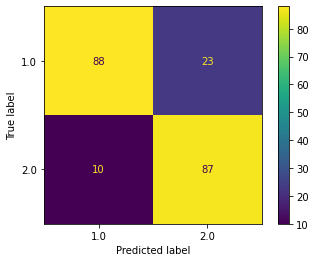

In [76]:
best_params_rf = gs1.best_params_
rf_model_1 = RandomForestClassifier(n_jobs=-1,random_state=42, criterion=best_params_rf['criterion'], 
                            max_leaf_nodes=best_params_rf['max_leaf_nodes'],min_samples_leaf=best_params_rf['min_samples_leaf'], min_samples_split = best_params_rf['min_samples_split'], n_estimators=best_params_rf['n_estimators']) 
rf_model_1.fit(X_train, y_train)
y_pred = rf_model_1.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)*100

kfold = StratifiedKFold(n_splits=10)
crossval_results = cross_val_score(rf_model_1, data, y, cv=kfold)
cross_acc = crossval_results.mean()*100
print("Test Accuracy: ",accuracy,"\nCross validation accuracy: ", cross_acc)

print(rf_model_1)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, rf_model_1.predict(X_train)))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_pred))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred))
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=rf_model_1.classes_)
cmd.plot()

### Training model on default parameters

Test Accuracy:  86.0576923076923 
Cross validation accuracy:  85.93230063109581
RandomForestClassifier(n_jobs=-1, random_state=42)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       305
         2.0       1.00      1.00      1.00       319

    accuracy                           1.00       624
   macro avg       1.00      1.00      1.00       624
weighted avg       1.00      1.00      1.00       624

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

         1.0       0.91      0.82      0.86       111
         2.0       0.81      0.91      0.86        97

    accuracy                           0.86       208
   macro avg       0.86      0.86      0.86       208
weighted avg       0.87      0.86      0.86       208

Roc_auc score
------------------------------------------------------

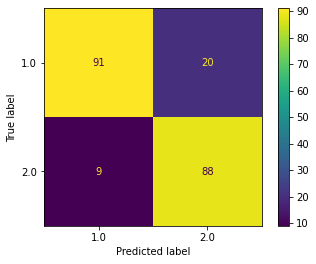

In [75]:
rf_model_2 = RandomForestClassifier(n_jobs=-1,random_state=42)
rf_model_2.fit(X_train, y_train)
y_pred = rf_model_2.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)*100

kfold = StratifiedKFold(n_splits=10)
crossval_results = cross_val_score(rf_model_2, data, y, cv=kfold)
cross_acc = crossval_results.mean()*100
print("Test Accuracy: ",accuracy,"\nCross validation accuracy: ", cross_acc)

print(rf_model_2)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, rf_model_2.predict(X_train)))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_pred))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred))
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=rf_model_2.classes_)
cmd.plot()
print(precision_recall_fscore_support(y_test,y_pred))

# Extra Tree classifier

In [35]:
from sklearn.ensemble import ExtraTreesClassifier

best_result_etc = {}
cross_best_result_etc = {}
max_accuracy_etc = 0
max_cross_acc_etc = 0

for method in feature_selection:
    data = scaled_data[method['Processing']]
    for i in range(3,11):
        info = {}
        info['Processing'] = method['Processing']
        info['Method'] = method['Method']
        info['Features'] = list(method['Features'].keys())[:i]
        
        data = scaled_data[method['Processing']]['data'][info['Features']]
        X_train = scaled_data[method['Processing']]['train'][info['Features']]
        X_test = scaled_data[method['Processing']]['test'][info['Features']]
        
        model = ExtraTreesClassifier(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        predictions = [round(value) for value in y_pred]
        accuracy = accuracy_score(y_test, predictions)*100

        # K-Fold Cross Validation
        kfold = StratifiedKFold(n_splits=10)
        crossval_results = cross_val_score(model, data, y, cv=kfold)
        cross_acc = crossval_results.mean()*100
        info['Cross Validation Accuracy'] = cross_acc
        info['Accuracy'] = accuracy
        if accuracy>max_accuracy_etc:
            max_accuracy_etc = accuracy
            best_result_etc = info
        if cross_acc>max_cross_acc_etc:
            max_cross_acc_etc = cross_acc
            cross_best_result_etc = info

print(best_result_etc)
print(cross_best_result_etc)

{'Processing': 'Standardized', 'Method': 'Extra Tree Classifier', 'Features': ['AP', 'TB', 'DB', 'SGOT', 'SGPT', 'A/G', 'Age', 'ALB'], 'Cross Validation Accuracy': 89.42484222604703, 'Accuracy': 90.86538461538461}
{'Processing': 'Standardized', 'Method': 'Correlation Matrix', 'Features': ['DB', 'TB', 'SGOT', 'SGPT', 'AP'], 'Cross Validation Accuracy': 91.46586345381526, 'Accuracy': 84.61538461538461}


In [79]:
X_train = scaled_data[best_result_etc['Processing']]['train'][best_result_etc['Features']]
X_test = scaled_data[best_result_etc['Processing']]['test'][best_result_etc['Features']]
data = scaled_data[best_result_etc['Processing']]['data'][best_result_etc['Features']]

In [40]:
params = {
    'n_estimators': [100, 150, 200, 500],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1.0,2,4,5],
    'min_samples_leaf': [1,2,4,5],
    'max_leaf_nodes': [4,10,20,50,None]
}

gs2 = GridSearchCV(ExtraTreesClassifier(n_jobs=-1,random_state=42), params, n_jobs=-1, cv=KFold(n_splits=10), scoring='accuracy')
gs2.fit(X_train, y_train)

print('Best score:', gs2.best_score_)
print('Best score:', gs2.best_params_)
best_params_etc =  gs2.best_params_

Best score: 0.8734767025089607
Best score: {'criterion': 'entropy', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


### Training model on best parameters obtained from gridsearchcv

Test Accuracy:  91.82692307692307 
Cross validation accuracy:  89.90533562822718
ExtraTreesClassifier(criterion='entropy', n_jobs=-1, random_state=42)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       305
         2.0       1.00      1.00      1.00       319

    accuracy                           1.00       624
   macro avg       1.00      1.00      1.00       624
weighted avg       1.00      1.00      1.00       624

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

         1.0       0.93      0.92      0.92       111
         2.0       0.91      0.92      0.91        97

    accuracy                           0.92       208
   macro avg       0.92      0.92      0.92       208
weighted avg       0.92      0.92      0.92       208

Roc_auc score
----------------------------------

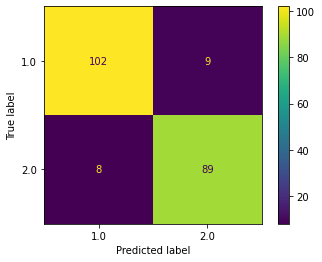

In [80]:
etc_model_1 = ExtraTreesClassifier(n_jobs=-1,random_state=42, criterion=best_params_etc['criterion'], 
                            max_leaf_nodes=best_params_etc['max_leaf_nodes'],min_samples_leaf=best_params_etc['min_samples_leaf'], min_samples_split = best_params_etc['min_samples_split'], n_estimators=best_params_etc['n_estimators']) 
etc_model_1.fit(X_train, y_train)
y_pred = etc_model_1.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)*100

kfold = StratifiedKFold(n_splits=10)
crossval_results = cross_val_score(etc_model_1, data, y, cv=kfold)
cross_acc = crossval_results.mean()*100
print("Test Accuracy: ",accuracy,"\nCross validation accuracy: ", cross_acc)

print(etc_model_1)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, etc_model_1.predict(X_train)))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_pred))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred))
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=etc_model_1.classes_)
cmd.plot()
print(precision_recall_fscore_support(y_test,y_pred))

### Training model on default parameters

In [42]:
etc_model_2 = ExtraTreesClassifier(n_jobs=-1,random_state=42)
etc_model_2.fit(X_train, y_train)
y_pred = etc_model_2.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)*100

kfold = StratifiedKFold(n_splits=10)
crossval_results = cross_val_score(etc_model_2, data, y, cv=kfold)
cross_acc = crossval_results.mean()*100
print("Test Accuracy: ",accuracy,"\nCross validation accuracy: ", cross_acc)

print(etc_model_2)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, etc_model_2.predict(X_train)))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_pred))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred))

Test Accuracy:  90.86538461538461 
Cross validation accuracy:  89.42484222604703
ExtraTreesClassifier(n_jobs=-1, random_state=42)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       305
         2.0       1.00      1.00      1.00       319

    accuracy                           1.00       624
   macro avg       1.00      1.00      1.00       624
weighted avg       1.00      1.00      1.00       624

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

         1.0       0.93      0.90      0.91       111
         2.0       0.89      0.92      0.90        97

    accuracy                           0.91       208
   macro avg       0.91      0.91      0.91       208
weighted avg       0.91      0.91      0.91       208

Roc_auc score
-------------------------------------------------------

# XGBoost Classifier

In [43]:
from xgboost import XGBClassifier

best_result_xgboost = {}
cross_best_result_xgboost = {}
max_accuracy_xgboost = 0
max_cross_acc_xgboost = 0

for method in feature_selection:
    data = scaled_data[method['Processing']]
    for i in range(3,11):
        info = {}
        info['Processing'] = method['Processing']
        info['Method'] = method['Method']
        info['Features'] = list(method['Features'].keys())[:i]
        
        data = scaled_data[method['Processing']]['data'][info['Features']]
        X_train = scaled_data[method['Processing']]['train'][info['Features']]
        X_test = scaled_data[method['Processing']]['test'][info['Features']]
        
        model = XGBClassifier(n_jobs=-1,random_state=42, eval_metric='mlogloss')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        predictions = [round(value) for value in y_pred]
        accuracy = accuracy_score(y_test, predictions)*100

        # K-Fold Cross Validation
        kfold = StratifiedKFold(n_splits=10)
        crossval_results = cross_val_score(model, data, y, cv=kfold)
        cross_acc = crossval_results.mean()*100
        info['Cross Validation Accuracy'] = cross_acc
        info['Accuracy'] = accuracy
        if accuracy>max_accuracy_xgboost:
            max_accuracy_xgboost = accuracy
            best_result_xgboost = info
        if cross_acc>max_cross_acc_xgboost:
            max_cross_acc_xgboost = cross_acc
            cross_best_result_xgboost = info

print(best_result_xgboost)
print(cross_best_result_xgboost)

{'Processing': 'Standardized', 'Method': 'Correlation Matrix', 'Features': ['DB', 'TB', 'SGOT', 'SGPT', 'AP', 'A/G', 'ALB', 'Age', 'Gender', 'TP'], 'Cross Validation Accuracy': 85.81755593803786, 'Accuracy': 82.21153846153845}
{'Processing': 'Absolute_max', 'Method': 'Univariate Selection', 'Features': ['DB', 'TB', 'SGOT', 'SGPT', 'A/G', 'ALB', 'Gender'], 'Cross Validation Accuracy': 87.86144578313252, 'Accuracy': 67.3076923076923}


In [81]:
X_train = scaled_data[best_result_xgboost['Processing']]['train'][best_result_xgboost['Features']]
X_test = scaled_data[best_result_xgboost['Processing']]['test'][best_result_xgboost['Features']]
data = scaled_data[best_result_xgboost['Processing']]['data'][best_result_xgboost['Features']]

### Training model on best parameters obtained from gridsearchcv

In [45]:
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

gs3 = GridSearchCV(XGBClassifier(n_jobs=-1,random_state=42), params, n_jobs=-1, cv=KFold(n_splits=10), scoring='accuracy')
gs3.fit(X_train, y_train)

print('Best score:', gs3.best_score_)
print('Best score:', gs3.best_params_)
best_params_xgb = gs3.best_params_

[10:54:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best score: 0.8413978494623656
Best score: {'base_score': 0.2, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.05, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 0.5}


### Training model on best parameters obtained from gridsearchcv

In [46]:
xgb_model_1 = XGBClassifier(n_jobs=-1,random_state=42, booster=best_params_xgb['booster'], gamma=best_params_xgb['gamma'], 
                    reg_alpha=best_params_xgb['reg_alpha'], reg_lambda =best_params_xgb['reg_lambda'], n_estimators=best_params_xgb['n_estimators'], base_score=best_params_xgb['base_score'], learning_rate = best_params_xgb['learning_rate'], eval_metric='mlogloss') 
xgb_model_1.fit(X_train, y_train)
y_pred = xgb_model_1.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)*100

kfold = StratifiedKFold(n_splits=10)
crossval_results = cross_val_score(xgb_model_1, data, y, cv=kfold)
cross_acc = crossval_results.mean()*100
print("Test Accuracy: ",accuracy,"\nCross validation accuracy: ", cross_acc)

print(xgb_model_1)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, xgb_model_1.predict(X_train)))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_pred))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred))

Test Accuracy:  81.25 
Cross validation accuracy:  86.1790017211704
XGBClassifier(base_score=0.2, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       305
         2.0       1.00      1.00      1.00       319

    accuracy                       

### Training model on default parameters

Test Accuracy:  82.21153846153845 
Cross validation accuracy:  85.81755593803786
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       305
         2.0       1.00      1.00      1.00       319

    accuracy     

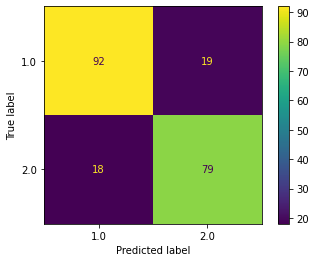

In [82]:
xgb_model_2 = XGBClassifier(n_jobs=-1,random_state=42, eval_metric='mlogloss') 
xgb_model_2.fit(X_train, y_train)
y_pred = xgb_model_2.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)*100

kfold = StratifiedKFold(n_splits=10)
crossval_results = cross_val_score(xgb_model_2, data, y, cv=kfold)
cross_acc = crossval_results.mean()*100
print("Test Accuracy: ",accuracy,"\nCross validation accuracy: ", cross_acc)

print(xgb_model_2)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, xgb_model_2.predict(X_train)))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_pred))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred))

cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=xgb_model_2.classes_)
cmd.plot()
print(precision_recall_fscore_support(y_test,y_pred))

# Gradient Boosting

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

best_result_gb = {}
cross_best_result_gb = {}
max_accuracy_gb = 0
max_cross_acc_gb = 0

for method in feature_selection:
    data = scaled_data[method['Processing']]
    for i in range(3,11):
        info = {}
        info['Processing'] = method['Processing']
        info['Method'] = method['Method']
        info['Features'] = list(method['Features'].keys())[:i]
        
        data = scaled_data[method['Processing']]['data'][info['Features']]
        X_train = scaled_data[method['Processing']]['train'][info['Features']]
        X_test = scaled_data[method['Processing']]['test'][info['Features']]
        
        model = GradientBoostingClassifier(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        predictions = [round(value) for value in y_pred]
        accuracy = accuracy_score(y_test, predictions)*100

        # K-Fold Cross Validation
        kfold = StratifiedKFold(n_splits=10)
        crossval_results = cross_val_score(model, data, y, cv=kfold)
        cross_acc = crossval_results.mean()*100
        info['Cross Validation Accuracy'] = cross_acc
        info['Accuracy'] = accuracy
        if accuracy>max_accuracy_gb:
            max_accuracy_gb = accuracy
            best_result_gb = info
        if cross_acc>max_cross_acc_gb:
            max_cross_acc_gb = cross_acc
            cross_best_result_gb = info

print(best_result_gb)
print(cross_best_result_gb)


{'Processing': 'Robust', 'Method': 'LGBM Classifier', 'Features': ['AP', 'Age', 'SGOT', 'SGPT', 'ALB', 'TP', 'A/G', 'TB', 'DB', 'Gender'], 'Cross Validation Accuracy': 80.40590935169249, 'Accuracy': 78.84615384615384}
{'Processing': 'Min_Max', 'Method': 'LGBM Classifier', 'Features': ['AP', 'Age', 'SGOT', 'SGPT', 'TP', 'ALB', 'TB'], 'Cross Validation Accuracy': 81.9650028686173, 'Accuracy': 66.34615384615384}


In [83]:
X_train = scaled_data[best_result_gb['Processing']]['train'][best_result_gb['Features']]
X_test = scaled_data[best_result_gb['Processing']]['test'][best_result_gb['Features']]
data = scaled_data[best_result_gb['Processing']]['data'][best_result_gb['Features']]

In [50]:
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.1, 0.2, 0.5],
    'criterion': ['friedman_mse','mse', 'mae'],
    'min_samples_split' : [2,4,5],
    'min_samples_leaf' : [1,2,4,5]
}

gs4 = GridSearchCV(GradientBoostingClassifier(random_state=42), params, n_jobs=-1, cv=KFold(n_splits=10), scoring='accuracy')
gs4.fit(X_train, y_train)

print('Best score:', gs4.best_score_)
print('Best score:', gs4.best_params_)
best_params_gb = gs4.best_params_

Best score: 0.8510752688172042
Best score: {'criterion': 'friedman_mse', 'learning_rate': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### Training model on best parameters obtained from gridsearchcv

In [51]:
gb_model_1 = GradientBoostingClassifier(random_state=42, criterion= best_params_gb['criterion'], 
                                    n_estimators=best_params_gb['n_estimators'], min_samples_split=best_params_gb['min_samples_split'],min_samples_leaf=best_params_gb['min_samples_leaf'], max_leaf_nodes=None, learning_rate = best_params_gb['learning_rate'])
gb_model_1.fit(X_train, y_train)
y_pred = gb_model_1.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)*100

kfold = StratifiedKFold(n_splits=10)
crossval_results = cross_val_score(gb_model_1, data, y, cv=kfold)
cross_acc = crossval_results.mean()*100
print("Test Accuracy: ",accuracy,"\nCross validation accuracy: ", cross_acc)

print(gb_model_1)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, gb_model_1.predict(X_train)))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_pred))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred))

Test Accuracy:  74.51923076923077 
Cross validation accuracy:  86.53757888697648
GradientBoostingClassifier(learning_rate=0.5, n_estimators=200, random_state=42)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       305
         2.0       1.00      1.00      1.00       319

    accuracy                           1.00       624
   macro avg       1.00      1.00      1.00       624
weighted avg       1.00      1.00      1.00       624

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

         1.0       0.73      0.83      0.78       111
         2.0       0.77      0.65      0.70        97

    accuracy                           0.75       208
   macro avg       0.75      0.74      0.74       208
weighted avg       0.75      0.75      0.74       208

Roc_auc score
-----------------------

### Training model on default parameters

Test Accuracy:  78.84615384615384 
Cross validation accuracy:  80.40590935169249
GradientBoostingClassifier(random_state=42)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

         1.0       0.98      0.90      0.94       305
         2.0       0.91      0.98      0.94       319

    accuracy                           0.94       624
   macro avg       0.94      0.94      0.94       624
weighted avg       0.94      0.94      0.94       624

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

         1.0       0.84      0.75      0.79       111
         2.0       0.74      0.84      0.79        97

    accuracy                           0.79       208
   macro avg       0.79      0.79      0.79       208
weighted avg       0.79      0.79      0.79       208

Roc_auc score
-------------------------------------------------------
0.79

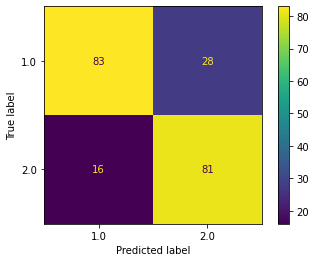

In [84]:
gb_model_2 = GradientBoostingClassifier(random_state=42) 
gb_model_2.fit(X_train, y_train)
y_pred = gb_model_2.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)*100

kfold = StratifiedKFold(n_splits=10)
crossval_results = cross_val_score(gb_model_2, data, y, cv=kfold)
cross_acc = crossval_results.mean()*100
print("Test Accuracy: ",accuracy,"\nCross validation accuracy: ", cross_acc)

print(gb_model_2)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, gb_model_2.predict(X_train)))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_pred))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred))

cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=gb_model_2.classes_)
cmd.plot()
print(precision_recall_fscore_support(y_test,y_pred))

# Stacking

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

Test Accuracy:  85.09615384615384 
Cross validation accuracy:  93.15117613310385
StackingClassifier(estimators=[('rf_1',
                                RandomForestClassifier(random_state=42)),
                               ('et_1', ExtraTreesClassifier(random_state=42)),
                               ('xgb_1',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              gamma=None, gpu_id=None,
                                              importance_type=None,
                                              interaction_...
                                              learning_r

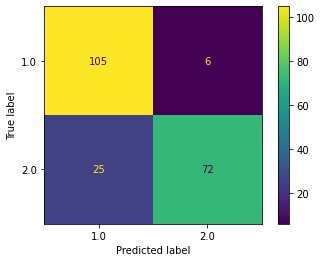

In [85]:
X_train = scaled_data['Robust']['train']
X_test = scaled_data['Robust']['test']
data = scaled_data['Robust']['data']

layer_one_estimators = [
            ('rf_1', RandomForestClassifier(random_state=42)),
            ('et_1', ExtraTreesClassifier(random_state=42)),
            ('xgb_1', XGBClassifier(random_state=42, eval_metric='mlogloss'))
        ]
stacking_model = StackingClassifier(estimators=layer_one_estimators, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)*100

kfold = StratifiedKFold(n_splits=10)
crossval_results = cross_val_score(stacking_model, data, y, cv=kfold)
cross_acc = crossval_results.mean()*100
print("Test Accuracy: ",accuracy,"\nCross validation accuracy: ", cross_acc)

print(stacking_model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, stacking_model.predict(X_train)))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_pred))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred))

cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=stacking_model.classes_)
cmd.plot()
print(precision_recall_fscore_support(y_test,y_pred))

# Bagging

In [55]:
from sklearn.ensemble import BaggingClassifier

best_result_bagging = {}
cross_best_result_bagging = {}
max_accuracy_bagging = 0
max_cross_acc_bagging = 0
for method in feature_selection:
    for i in range(3,11):
        info = {}
        info['Processing'] = method['Processing']
        info['Method'] = method['Method']
        info['Features'] = list(method['Features'].keys())[:i]
        
        data = scaled_data[method['Processing']]['data'][info['Features']]
        X_train = scaled_data[method['Processing']]['train'][info['Features']]
        X_test = scaled_data[method['Processing']]['test'][info['Features']]
        
        model = BaggingClassifier(n_jobs=-1,random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        predictions = [round(value) for value in y_pred]
        accuracy = accuracy_score(y_test, predictions)*100

        # K-Fold Cross Validation
        kfold = StratifiedKFold(n_splits=10)
        crossval_results = cross_val_score(model, data, y, cv=kfold)
        cross_acc = crossval_results.mean()*100
        info['Cross Validation Accuracy'] = cross_acc
        info['Accuracy'] = accuracy
        if accuracy>max_accuracy_bagging:
            max_accuracy_bagging = accuracy
            best_result_bagging = info
        if cross_acc>max_cross_acc_bagging:
            max_cross_acc_bagging = cross_acc
            cross_best_result_bagging = info

In [56]:
print(best_result_bagging)
print(cross_best_result_bagging)

{'Processing': 'Standardized', 'Method': 'Correlation Matrix', 'Features': ['DB', 'TB', 'SGOT', 'SGPT', 'AP', 'A/G', 'ALB', 'Age', 'Gender'], 'Cross Validation Accuracy': 87.01807228915663, 'Accuracy': 83.65384615384616}
{'Processing': 'Absolute_max', 'Method': 'LGBM Classifier', 'Features': ['AP', 'Age', 'SGOT', 'SGPT', 'ALB', 'TP', 'A/G', 'TB', 'DB', 'Gender'], 'Cross Validation Accuracy': 87.50143430866322, 'Accuracy': 68.26923076923077}


In [86]:
X_train = scaled_data[best_result_bagging['Processing']]['train'][best_result_bagging['Features']]
X_test = scaled_data[best_result_bagging['Processing']]['test'][best_result_bagging['Features']]
data = scaled_data[best_result_bagging['Processing']]['data'][best_result_bagging['Features']]

In [58]:
params = {
    'n_estimators': [100, 200, 300]
}
gs5 = GridSearchCV(BaggingClassifier(n_jobs=-1,random_state=42),
                   params, n_jobs=-1, cv=KFold(n_splits=10), scoring='accuracy')
gs5.fit(X_train, y_train)

print('Best score:', gs5.best_score_)
print('Best score:', gs5.best_params_)
best_params_bagging = gs5.best_params_

Best score: 0.8302867383512545
Best score: {'n_estimators': 200}


Test Accuracy:  84.13461538461539 
Cross validation accuracy:  85.20654044750431
BaggingClassifier(n_estimators=200, random_state=42)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       305
         2.0       1.00      1.00      1.00       319

    accuracy                           1.00       624
   macro avg       1.00      1.00      1.00       624
weighted avg       1.00      1.00      1.00       624

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

         1.0       0.90      0.79      0.84       111
         2.0       0.79      0.90      0.84        97

    accuracy                           0.84       208
   macro avg       0.84      0.84      0.84       208
weighted avg       0.85      0.84      0.84       208

Roc_auc score
---------------------------------------------------

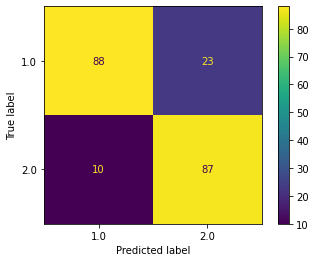

In [87]:
bagging_model_1 = BaggingClassifier(random_state=42, n_estimators=best_params_bagging['n_estimators']) 
bagging_model_1.fit(X_train, y_train)
y_pred = bagging_model_1.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)*100

kfold = StratifiedKFold(n_splits=10)
crossval_results = cross_val_score(bagging_model_1, data, y, cv=kfold)
cross_acc = crossval_results.mean()*100
print("Test Accuracy: ",accuracy,"\nCross validation accuracy: ", cross_acc)

print(bagging_model_1)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, bagging_model_1.predict(X_train)))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_pred))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred))

cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=bagging_model_1.classes_)
cmd.plot()
print(precision_recall_fscore_support(y_test,y_pred))

In [60]:
bagging_model_2 = BaggingClassifier(random_state=42) 
bagging_model_2.fit(X_train, y_train)
y_pred = bagging_model_2.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)*100

kfold = StratifiedKFold(n_splits=10)
crossval_results = cross_val_score(bagging_model_2, data, y, cv=kfold)
cross_acc = crossval_results.mean()*100
print("Test Accuracy: ",accuracy,"\nCross validation accuracy: ", cross_acc)

print(bagging_model_2)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, bagging_model_2.predict(X_train)))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_pred))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred))

Test Accuracy:  83.65384615384616 
Cross validation accuracy:  87.01807228915663
BaggingClassifier(random_state=42)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99       305
         2.0       0.99      0.99      0.99       319

    accuracy                           0.99       624
   macro avg       0.99      0.99      0.99       624
weighted avg       0.99      0.99      0.99       624

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

         1.0       0.84      0.86      0.85       111
         2.0       0.83      0.81      0.82        97

    accuracy                           0.84       208
   macro avg       0.84      0.84      0.84       208
weighted avg       0.84      0.84      0.84       208

Roc_auc score
-------------------------------------------------------
0.83514442277

# Voting Classifier

In [62]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier

votes = [
    ('rf', gs1.best_estimator_),
    ('xt', gs2.best_estimator_),
    ('xgb', gs3.best_estimator_)
]

# soft voting based on weights
votesClass = VotingClassifier(estimators=votes, voting='soft', n_jobs=-1)
votesClass_cv = cross_validate(votesClass, X_train, y_train, cv=KFold(10))
votesClass.fit(X_train, y_train)

votesClass_cv

{'fit_time': array([7.22869301, 4.49807596, 3.22238803, 2.87996912, 2.89093471,
        1.55797791, 1.6946435 , 3.00481248, 1.52737617, 1.50455236]),
 'score_time': array([0.17752481, 0.14660597, 0.14560914, 0.14062262, 0.14461112,
        0.14744377, 0.14426661, 0.14145064, 0.14261723, 0.15454364]),
 'test_score': array([0.80952381, 0.85714286, 0.84126984, 0.80952381, 0.90322581,
        0.83870968, 0.83870968, 0.87096774, 0.82258065, 0.83870968])}

In [64]:
voting_model = votesClass
voting_model.fit(X_train, y_train)
y_train_hat = voting_model.predict(X_train)
y_test_hat = voting_model.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test, y_test_hat)*100)
print(voting_model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))


Test Accuracy:  82.21153846153845
VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=500,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('xt',
                              ExtraTreesClassifier(criterion='entropy',
                                                   n_jobs=-1,
                                                   random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=0.2, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            enable_categorical=False, gamma=0,
                      

In [65]:
import pickle
pickle.dump(model, open("rf.sav", 'wb'))
pickle.dump(etc_model_1, open("etc.sav", 'wb'))
pickle.dump(xgb_model_2, open("xgb.sav", 'wb'))
pickle.dump(gb_model_2, open("gb.sav", 'wb'))
pickle.dump(stacking_model, open("stacking.sav", 'wb'))
pickle.dump(bagging_model_2, open("bagging.sav", 'wb'))